In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/home/hasan/Desktop/DATA_SET/loan-prediction-problem-dataset/train.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data = data.sample(frac=1).reset_index(drop=True)

In [8]:
data = data.dropna(how='all')

In [9]:
data.shape

(614, 13)

In [10]:
data.fillna(method='ffill', inplace=True)

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       1
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
data[data['Gender']=='Male'].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP002187,Male,No,0,Graduate,No,2500,0.0,96.0,480.0,1.0,Semiurban,N
2,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
3,LP001507,Male,Yes,0,Graduate,No,2698,2034.0,122.0,360.0,1.0,Semiurban,Y
4,LP001326,Male,No,0,Graduate,No,6782,0.0,122.0,360.0,1.0,Urban,N
6,LP001578,Male,Yes,0,Graduate,No,2439,3333.0,129.0,360.0,1.0,Rural,Y


In [13]:
#counting male and female number
data.groupby(['Gender']).Gender.agg(['count'])

,count
Gender,
Female,112
Male,502


In [14]:
data.groupby(['Gender','Married']).Married.count()

Gender  Married
Female  No          80
        Yes         32
Male    No         134
        Yes        368
Name: Married, dtype: int64

In [15]:
#printing only Unmarried Female
Female_unMarried = data[(data['Gender']=='Female') & (data['Married']=='No')]
Female_unMarried.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002043,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban,Y
13,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
14,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y
16,LP002055,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,0.0,Rural,Y
19,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y


In [16]:
data['Dependents'] = data['Dependents'].str.replace('+','')

In [17]:
data['Dependents'] = data['Dependents'].astype(int)

In [18]:
data.groupby(['Gender','Married','Dependents']).Dependents.count()

Gender  Married  Dependents
Female  No       0              61
                 1              13
                 2               2
                 3               4
        Yes      0              21
                 1               6
                 2               5
Male    No       0             113
                 1              10
                 2               7
                 3               4
        Yes      0             158
                 1              77
                 2              88
                 3              45
Name: Dependents, dtype: int64

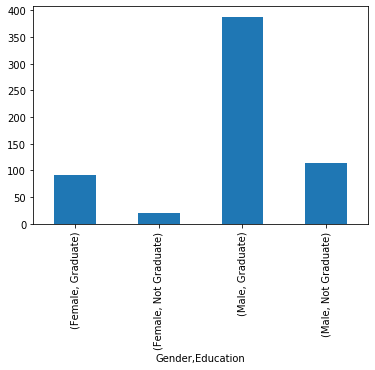

In [19]:
data.groupby(['Gender','Education']).Education.count().plot(kind='bar')

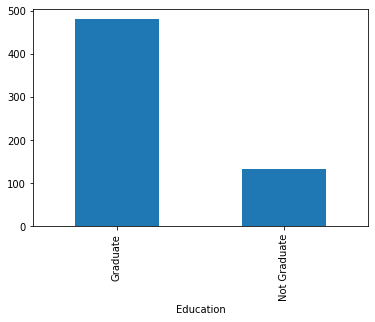

In [20]:
data.groupby(['Education']).Education.count().plot(kind='bar')

In [21]:
data.groupby(['Gender','Self_Employed']).Self_Employed.count()

Gender  Self_Employed
Female  No                97
        Yes               15
Male    No               430
        Yes               72
Name: Self_Employed, dtype: int64

In [22]:
data.groupby(['Education','Self_Employed']).Self_Employed.count()

Education     Self_Employed
Graduate      No               411
              Yes               69
Not Graduate  No               116
              Yes               18
Name: Self_Employed, dtype: int64

In [23]:
data.groupby(['Gender','Education','Self_Employed']).Self_Employed.count()

Gender  Education     Self_Employed
Female  Graduate      No                81
                      Yes               11
        Not Graduate  No                16
                      Yes                4
Male    Graduate      No               330
                      Yes               58
        Not Graduate  No               100
                      Yes               14
Name: Self_Employed, dtype: int64

In [24]:
data[data['ApplicantIncome']>10000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
27,LP001350,Male,Yes,1,Graduate,No,13650,0.0,113.0,360.0,1.0,Urban,Y
31,LP001844,Male,No,0,Graduate,Yes,16250,0.0,192.0,360.0,0.0,Urban,N
62,LP001508,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban,Y
87,LP002501,Male,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
90,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
93,LP002531,Male,Yes,1,Graduate,Yes,16667,2250.0,86.0,360.0,1.0,Semiurban,Y
106,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
108,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
113,LP002386,Male,No,0,Graduate,Yes,12876,0.0,405.0,360.0,1.0,Semiurban,Y


In [25]:
id_income = data.loc[:,['Loan_ID','ApplicantIncome']]
id_income.head()

,Loan_ID,ApplicantIncome
0,LP002043,3541
1,LP002187,2500
2,LP002097,4384
3,LP001507,2698
4,LP001326,6782


In [26]:
id_income[id_income['ApplicantIncome']>15000]

,Loan_ID,ApplicantIncome
31,LP001844,16250
87,LP002501,16692
93,LP002531,16667
106,LP002101,63337
108,LP002547,18333
121,LP002938,16120
131,LP002317,81000
191,LP002194,15759
218,LP002699,17500
280,LP001922,20667


In [27]:
data[(data['Gender']=='Male') & (data['Education']=='Graduate') & (data['ApplicantIncome']>15000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
31,LP001844,Male,No,0,Graduate,Yes,16250,0.0,192.0,360.0,0.0,Urban,N
87,LP002501,Male,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
93,LP002531,Male,Yes,1,Graduate,Yes,16667,2250.0,86.0,360.0,1.0,Semiurban,Y
106,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
108,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
121,LP002938,Male,Yes,0,Graduate,Yes,16120,0.0,260.0,360.0,1.0,Urban,Y
131,LP002317,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
218,LP002699,Male,Yes,2,Graduate,Yes,17500,0.0,400.0,360.0,1.0,Rural,Y
280,LP001922,Male,Yes,0,Graduate,No,20667,0.0,187.0,360.0,1.0,Rural,N
297,LP002527,Male,Yes,2,Graduate,Yes,16525,1014.0,150.0,360.0,1.0,Rural,Y


In [28]:
#row of which CoapplicantIncome=0
loan_id = data.loc[:,['Loan_ID','Gender','CoapplicantIncome']]
zero = loan_id[loan_id['CoapplicantIncome']==0]
zero

,Loan_ID,Gender,CoapplicantIncome
0,LP002043,Female,0.0
1,LP002187,Male,0.0
4,LP001326,Male,0.0
7,LP002296,Male,0.0
10,LP002100,Male,0.0
...,...,...,...
602,LP002002,Female,0.0
605,LP001250,Male,0.0
607,LP001536,Male,0.0
609,LP002606,Female,0.0


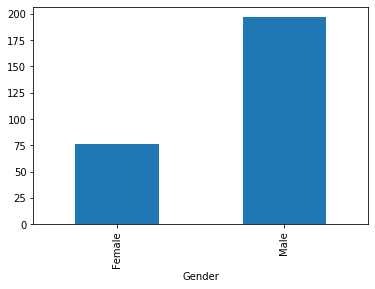

In [29]:
zero.groupby(['Gender']).CoapplicantIncome.count().plot(kind='bar')

In [30]:
data[data['LoanAmount']>400]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
101,LP001610,Male,Yes,3,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
106,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
108,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
113,LP002386,Male,No,0,Graduate,Yes,12876,0.0,405.0,360.0,1.0,Semiurban,Y
310,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
344,LP001907,Male,Yes,0,Graduate,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
355,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,1.0,Urban,Y
419,LP001585,Male,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
489,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N
495,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y


In [31]:
#loan term only for 360 days
data[data['Loan_Amount_Term']==360]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002043,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban,Y
2,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
3,LP001507,Male,Yes,0,Graduate,No,2698,2034.0,122.0,360.0,1.0,Semiurban,Y
4,LP001326,Male,No,0,Graduate,No,6782,0.0,122.0,360.0,1.0,Urban,N
5,LP001671,Female,Yes,0,Graduate,No,3416,2816.0,113.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
608,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,0.0,Urban,N
609,LP002606,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban,Y
612,LP002841,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban,N


In [32]:
data['Credit_History'].unique()

array([nan,  1.,  0.])

In [33]:
data['Property_Area'].unique()

array(['Semiurban', 'Urban', 'Rural'], dtype=object)

In [34]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002043,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban,Y
1,LP002187,Male,No,0,Graduate,No,2500,0.0,96.0,480.0,1.0,Semiurban,N
2,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
3,LP001507,Male,Yes,0,Graduate,No,2698,2034.0,122.0,360.0,1.0,Semiurban,Y
4,LP001326,Male,No,0,Graduate,No,6782,0.0,122.0,360.0,1.0,Urban,N


In [35]:
data.shape

(614, 13)

In [36]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [37]:
data.drop(['Loan_ID','Gender','Married','Education','Property_Area'], axis=1, inplace=True)

In [38]:
data.isnull().sum()

Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       1
Loan_Status          0
dtype: int64

In [39]:
data.dtypes

Dependents             int64
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status           object
dtype: object

In [40]:
employed = {'Yes':'1','No':'0'}
data['Self_Employed'] = [employed[i] for i in data['Self_Employed']]

In [41]:
data['Self_Employed'] = data['Self_Employed'].astype(int)

In [42]:
data.dtypes

Dependents             int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Loan_Status           object
dtype: object

In [43]:
data['Dependents'].unique()

array([1, 0, 2, 3])

In [44]:
data['Self_Employed'].unique()

array([0, 1])

In [45]:
data['Credit_History'].unique()

array([nan,  1.,  0.])

In [46]:
#target column is credit history
y = data['Credit_History']
data.drop('Credit_History', axis=1, inplace=True)